support our [foundation](https://manyunya276689.wixsite.com/anti-ezhi)

In [105]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

/kaggle/input/moscow/export.geojson
/kaggle/input/ezhi-victims/EzhiVictims (1).csv


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas

warnings.filterwarnings("ignore")

# Работа с признаками

Посмотрим на нашу таблицу:

In [108]:
data = pd.read_csv(path, index_col = 'EzhisVictimID')
data.head()

,Name,Survived,MetroStation,SceneOfTheCrime,Age,Sex,Weight,IQ,Siblings,Parents,PassID
EzhisVictimID,,,,,,,,,,,
1,Иванов; Давид,0,Павелецкая,бар,4.9,мальчик,0.3,30,1,0,A/5 21171
2,Смирнова; Марина,1,Академическая,начальная школа,8.5,девочка,2.6,10,1,0,PC 17599
3,Кузнецова; Галина,1,Павелецкая,бар,5.8,девочка,0.3,30,0,0,STON/O2. 3101282
4,Попова; Юлия,1,Александровский сад,бар,7.8,девочка,2.0,10,1,0,113803
5,Васильев; Кирилл,0,Павелецкая,бар,7.8,мальчик,0.3,30,0,0,373450


Проверим пропуски в данных:

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             886 non-null    object 
 1   Survived         891 non-null    int64  
 2   MetroStation     891 non-null    object 
 3   SceneOfTheCrime  889 non-null    object 
 4   Age              714 non-null    float64
 5   Sex              891 non-null    object 
 6   Weight           891 non-null    float64
 7   IQ               891 non-null    int64  
 8   Siblings         891 non-null    int64  
 9   Parents          891 non-null    int64  
 10  PassID           891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Есть пропуски в столбцах Age (заполним медианным значением), SceneOfTheCrime (заменим ненулевой строкой), Name (пропусков немного, поэтому удалим строки с ними)

In [110]:
data.dropna(subset = ['Name'],inplace = True)
data.SceneOfTheCrime.fillna('неизвестно', inplace = True)
data.Age.fillna(data.Age.median(), inplace = True)

### Распределение вещественных признаков

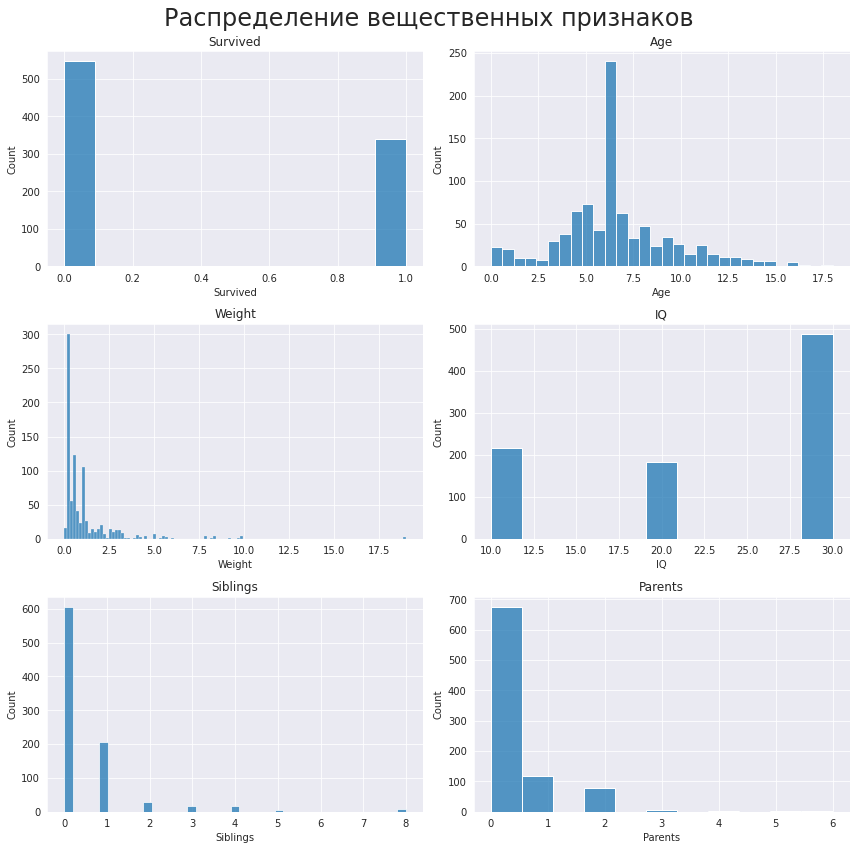

In [111]:
sns.set_style("darkgrid")

num_cols = list(data.columns[data.dtypes.values!='O'])
len_num_cols = len(num_cols)

fig, axes = plt.subplots(len_num_cols//2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(data = data, x = column, ax = axes[i]).set_title(column)

plt.suptitle('Распределение вещественных признаков', fontsize = 24)
plt.tight_layout()

Признаки Age и Weight непрерывные, остальные дискретные. Видно, что Ежи атакует детей в возрасте от 0 до 18 лет, предпочитая детей с высоким IQ. Ежи чаще атакует детей, пока они одни, вероятность выжить при атаке меньше 0,5

### Распределение категориальных признаков 

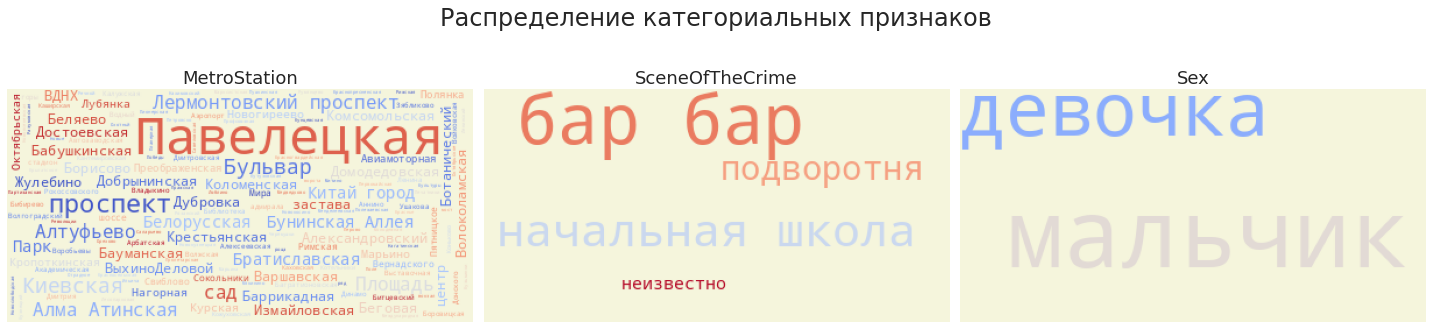

In [113]:
text_cols = ['MetroStation', 'SceneOfTheCrime', 'Sex']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 20, background_color='beige',colormap="coolwarm",)
fig, axes = plt.subplots(1, 3, figsize=(20, 12))

for i, column in enumerate(text_cols):
  op = wc.generate(' '.join(data[column].values))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(column, fontsize=18)
  _ = axes[i].axis('off')

plt.suptitle('Распределение категориальных признаков', fontsize = 24, y=0.70)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Ежи предпочитает мальчиков девочкам. Любимое место для нападения - бар, а станция метро - Павелецкая.

Проанализируем семьи с большим количеством пострадавших

In [114]:
data[data.Siblings >5]

,Name,Survived,MetroStation,SceneOfTheCrime,Age,Sex,Weight,IQ,Siblings,Parents,PassID
EzhisVictimID,,,,,,,,,,,
160,Воронов; Олег,0,Павелецкая,бар,6.2,мальчик,2.6,30,8,2,CA. 2343
181,Воронова; Амалия,0,Павелецкая,бар,6.2,девочка,2.6,30,8,2,CA. 2343
202,Воронов; Артём,0,Павелецкая,бар,6.2,мальчик,2.6,30,8,2,CA. 2343
325,Воронов; Данил,0,Павелецкая,бар,6.2,мальчик,2.6,30,8,2,CA. 2343
793,Воронова; Ксения,0,Павелецкая,бар,6.2,девочка,2.6,30,8,2,CA. 2343
847,Воронов; Одиссей,0,Павелецкая,бар,6.2,мальчик,2.6,30,8,2,CA. 2343
864,Воронова; Мария,0,Павелецкая,бар,6.2,девочка,2.6,30,8,2,CA. 2343


Как видно, некоторые жертвы были из одной семьи и имели одинаковые фамилии. Добавим отдельные признаки с именами и фамилиями

In [115]:
data['Surname'] = data["Name"].apply(lambda s: s.split(";")[0])
data['FirstName'] = data["Name"].apply(lambda s: s.split(";")[1])
data.head()

,Name,Survived,MetroStation,SceneOfTheCrime,Age,Sex,Weight,IQ,Siblings,Parents,PassID,Surname,FirstName
EzhisVictimID,,,,,,,,,,,,,
1,Иванов; Давид,0,Павелецкая,бар,4.9,мальчик,0.3,30,1,0,A/5 21171,Иванов,Давид
2,Смирнова; Марина,1,Академическая,начальная школа,8.5,девочка,2.6,10,1,0,PC 17599,Смирнова,Марина
3,Кузнецова; Галина,1,Павелецкая,бар,5.8,девочка,0.3,30,0,0,STON/O2. 3101282,Кузнецова,Галина
4,Попова; Юлия,1,Александровский сад,бар,7.8,девочка,2.0,10,1,0,113803,Попова,Юлия
5,Васильев; Кирилл,0,Павелецкая,бар,7.8,мальчик,0.3,30,0,0,373450,Васильев,Кирилл


Преобразуем женские фамилии в начальную форму

In [116]:
l = data[data.Sex == 'девочка']['Surname'].values
ends = []
for i in l:
    ends.append(i[-3:])
ends = set(ends)
print(ends)

d = {i:j for i, j in zip(ends, ['ных', 'кий', 'ов', 'ев', 'ин'])}
data['Surname'] = data['Surname'].apply(lambda x: x[:-3]+d.get(x[-3:], x[-3:]))

{'кая', 'ина', 'ных', 'ева', 'ова'}


Построим графики для 10 семей, наиболее пострадавших от Ежи

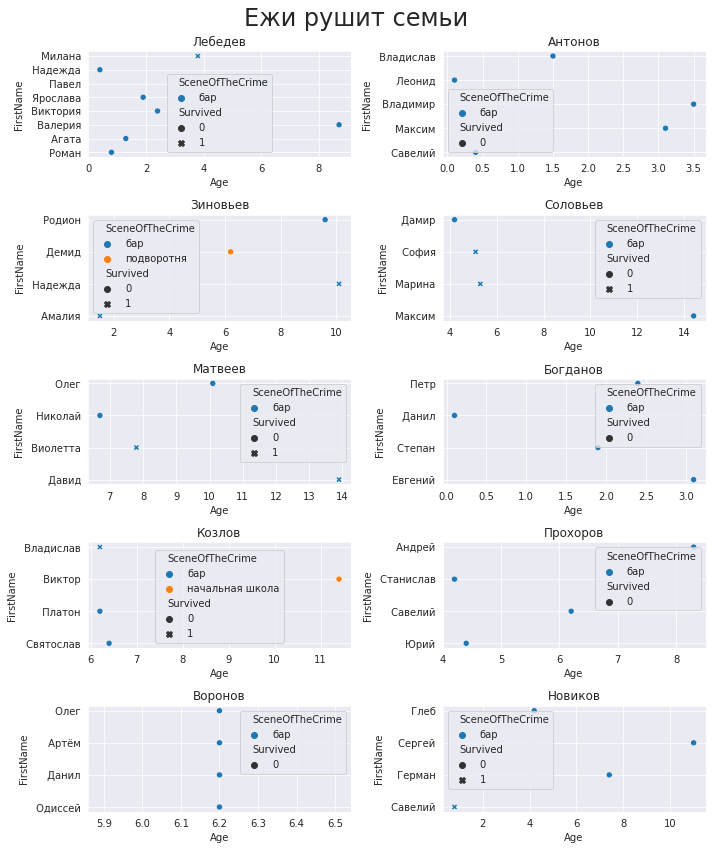

In [117]:
prominent_families = data.groupby('Surname')['Name'].count().sort_values(ascending = False)[:10].index.to_list()

fig, axes = plt.subplots(5, 2, figsize = (10, 12))
axes = axes.flatten()

for i, family in enumerate(prominent_families):
    sns.scatterplot(data = data[data.Surname == family], y = 'FirstName', x = 'Age', hue = 'SceneOfTheCrime',style = 'Survived', ax = axes[i]).set_title(family)
    #axes[i].legend(labels=['a', 'Nah Bruh'])

plt.suptitle('Ежи рушит семьи', fontsize = 24)
plt.tight_layout()


Заметим, что Ежи чаще всего атакует всю семью целиком, находясь в баре. Есть исключения: в семье Козловых Виктор был атакован в начальной школе, а Демид Зиновьев был атакован в подворотне. В 6 семьях из 10 некоторые члены смогли выжить

Рассмотрим зависимости количества умерших от пола, места преступления и IQ жертвы

In [118]:
pivoted = []
pivoted.append(pd.pivot_table(data.reset_index(), index = 'Sex', columns = 'Survived', values = 'EzhisVictimID', aggfunc='count'))
pivoted.append(pd.pivot_table(data.reset_index(), index = 'SceneOfTheCrime', columns = 'Survived', values = 'EzhisVictimID', aggfunc='count'))
pivoted.append(pd.pivot_table(data.reset_index(), index = 'IQ', columns = 'Survived', values = 'EzhisVictimID', aggfunc='count'))

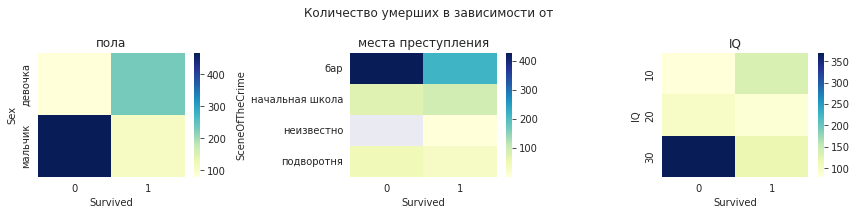

In [119]:
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
axes = axes.flatten()

for i in range(3):
    sns.heatmap(pivoted[i],  cmap="YlGnBu", ax = axes[i]).set_title(('пола', 'места преступления', 'IQ')[i])

plt.suptitle('Количество умерших в зависимости от')
plt.tight_layout()

Большинство девочек переживает нападение Ежи, а большинство мальчиков умирает. Категория риска: мальчики, проводящие время в барах и имеющие высокий IQ

# Карта нападений Ежи

Посмотрим, сколько преступлений совершил Ежи в разных районах Москвы

In [137]:
l = pd.read_json('https://api.hh.ru/metro/1')['lines'].to_list()

station = []
line = []
lat = []
lng = []
for j in l:
    for i in j['stations']:
        station.append(i['name'])
        lat.append(i['lat'])
        lng.append(i['lng'])
        line.append(j['name'])
metro = pd.DataFrame({'name': station, 'lat': lat, 'lng':lng, 'line': line}).set_index('name')
metro.head()
metro_lines = metro.reset_index()

counts_of_crime = pd.DataFrame(data.groupby('MetroStation')['Name'].count()).rename(columns = {'Name': 'counts'})
metro = metro.join(counts_of_crime)
metro.dropna(inplace = True)

print('Топ-5 самых опасных станций:', *metro.sort_values('counts', ascending = False).index.unique()[:5].to_list(), sep = '\n')

Топ-5 самых опасных станций:
Павелецкая
Киевская
Лермонтовский проспект
Алма-Атинская
Алтуфьево


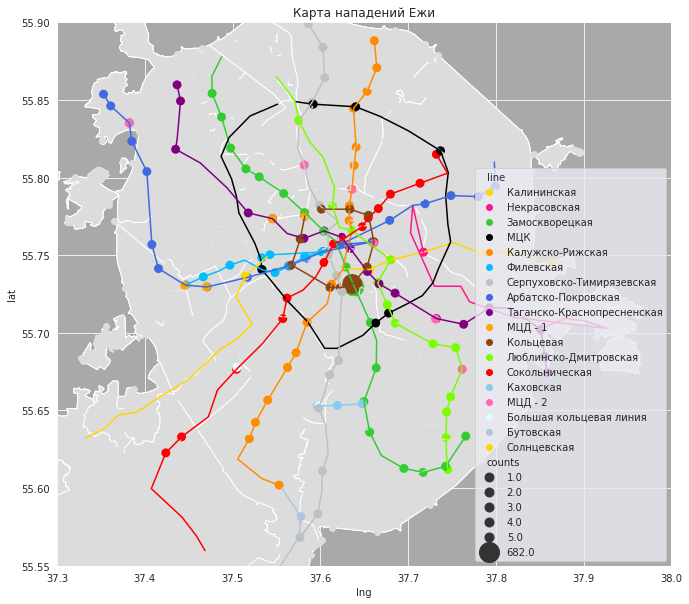

In [138]:
gdf = geopandas.read_file('/kaggle/input/moscow/export.geojson')

colors = ["gold","deeppink","limegreen", "black", "darkorange", "deepskyblue", "silver", "royalblue", "purple", "orange", "saddlebrown", "lawngreen", "red", "skyblue", "hotpink", "lightcyan", "lightsteelblue", "gold"]

gdf.plot(figsize=(20,10), color = 'gainsboro').set_facecolor('darkgray')
sns.scatterplot(data = metro, y = 'lat', x = 'lng', hue="line", size="counts", sizes=(80, 400), palette = colors, linewidth=0)

plt.ylim((55.55,55.9))
plt.xlim((37.3,38))

for line, color in zip(metro.line.unique(), colors):
    if line not in ['МЦД - 2', 'Большая кольцевая линия', 'МЦД - 1']:
        linedf = metro_lines[metro_lines.line == line][['lat', 'lng']]
        sns.lineplot(data = linedf, y = 'lat', x = 'lng', color = color, sort=False)

plt.title('Карта нападений Ежи')
plt.show()